# If you want consistent returns you have to stay invested in the market for long term.
## "the stock market is a device for transferring money from the impatient to the patient" Warren Buffett
This Jupyter notebook evaluate this argument with NIFTY data from 01/01/1996 till today. While we are able to prove this point, what makes the task of remaining invensted difficult is fluctuation in CAGR you will see even in 3 years and 5 years. In some cases three year and even five year returns could be negative. Only when look at 10 year period you will see allways positive return, with return of CAGR 12.5%

In [14]:
import pandas as pd
import numpy as np

Use the nsepython module to get the data directly from __NSE__

In [15]:
from nsepython import index_history
from datetime import datetime
today_str = datetime.now().strftime('%d-%b-%Y') 
df = index_history("NIFTY 50",'01-Jan-1996', today_str)

In [16]:
# Convert HistoricalDate to datetime format and make it the index
df['Date']= pd.to_datetime(df['HistoricalDate'])
df.set_index('Date', inplace=True)

In [17]:
df['Real'] = True
# Change the frequency to daily
df = df.asfreq('D')

In [18]:
# Add the missing data for holidays and change type to float
df['CLOSE'] = df['CLOSE'].ffill().astype(float)

In [19]:
print(df)

           Index Name INDEX_NAME HistoricalDate      OPEN      HIGH      LOW  \
Date                                                                           
1996-01-01   Nifty 50   Nifty 50    01 Jan 1996    913.11    913.11   906.15   
1996-01-02   Nifty 50   Nifty 50    02 Jan 1996    906.78    906.78   899.52   
1996-01-03   Nifty 50   Nifty 50    03 Jan 1996    901.66    904.48   895.48   
1996-01-04   Nifty 50   Nifty 50    04 Jan 1996    891.37    891.37    884.1   
1996-01-05   Nifty 50   Nifty 50    05 Jan 1996    887.79    887.79   881.74   
...               ...        ...            ...       ...       ...      ...   
2024-01-19   Nifty 50   Nifty 50    19 Jan 2024   21615.2   21670.6    21575   
2024-01-20   Nifty 50   Nifty 50    20 Jan 2024  21706.15   21720.3  21541.8   
2024-01-21        NaN        NaN            NaN       NaN       NaN      NaN   
2024-01-22        NaN        NaN            NaN       NaN       NaN      NaN   
2024-01-23   Nifty 50   Nifty 50    23 J

<Axes: xlabel='Date'>

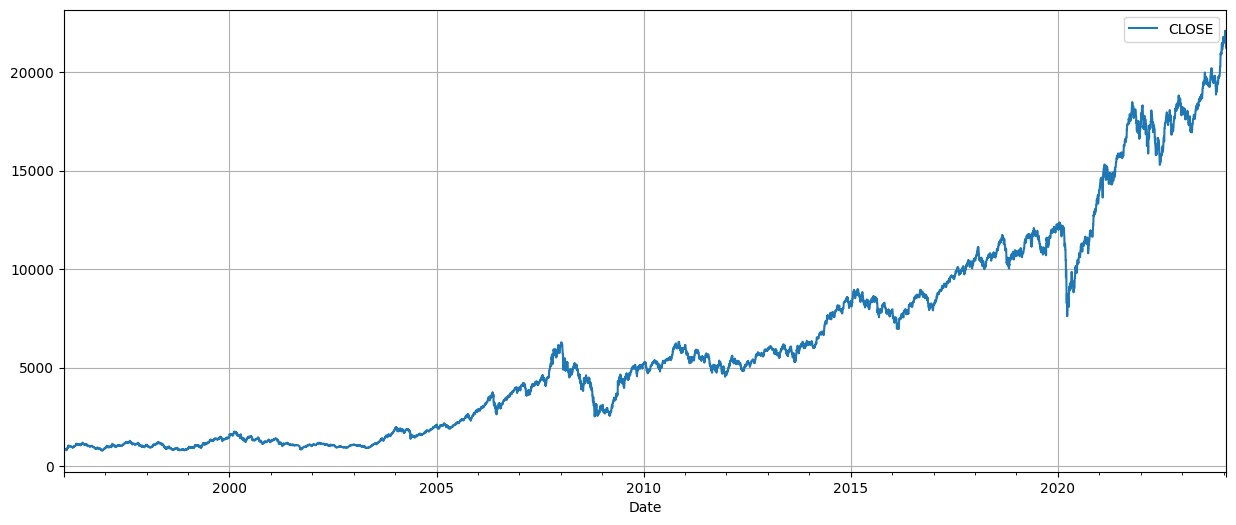

In [20]:
df.plot(y='CLOSE',grid=True, figsize=(15,6))

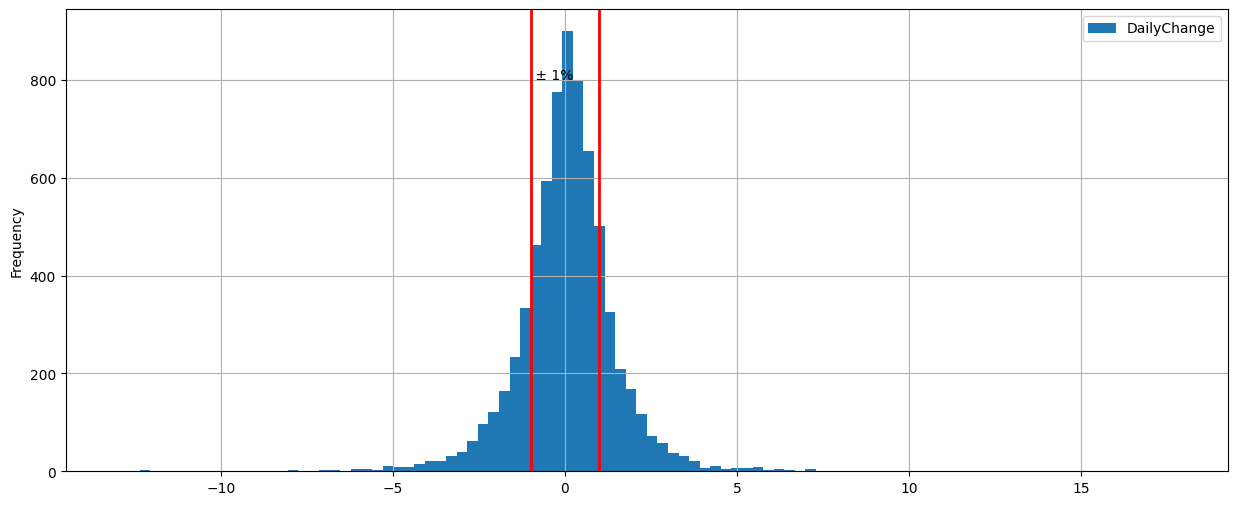

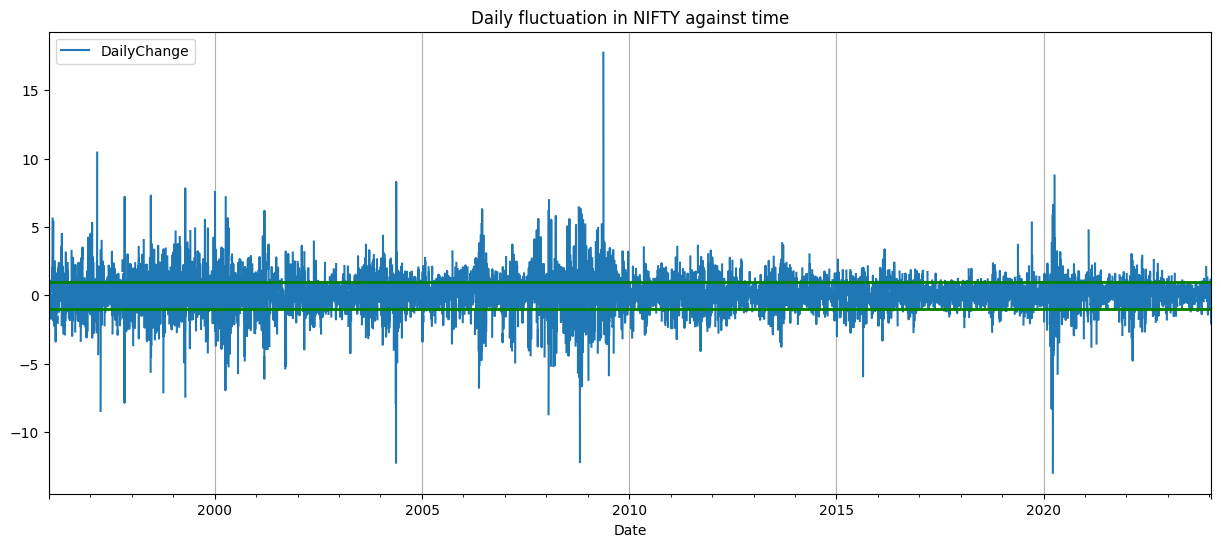

In [8]:
# Find Daily change for real values.
df['Daily'] = (df['CLOSE'] - df['CLOSE'].shift(1))*100/(df['CLOSE'].shift(1))
df['DailyChange'] = np.where(df['Real']== True, df['Daily'] , None)
# draw histogram
hist_plot = df.plot(y='DailyChange',kind='hist', bins=100, figsize=(15,6),grid=True)
hist_plot.axvline(x=1, color= 'red', linewidth=2)
hist_plot.axvline(x=-1, color= 'red', linewidth=2)
hist_plot.text(x=-1, y=800, s=' ± 1%');
bar_plot = df.plot(title = 'Daily fluctuation in NIFTY against time', y='DailyChange', figsize=(15,6), grid=True);
bar_plot.legend(loc='upper left');
bar_plot.grid(axis='y');
bar_plot.axhline(y=1, color= 'green', linewidth=2)
bar_plot.axhline(y=-1, color= 'green', linewidth=2)

<Axes: title={'center': 'Yearly return gainst time'}, xlabel='Date'>

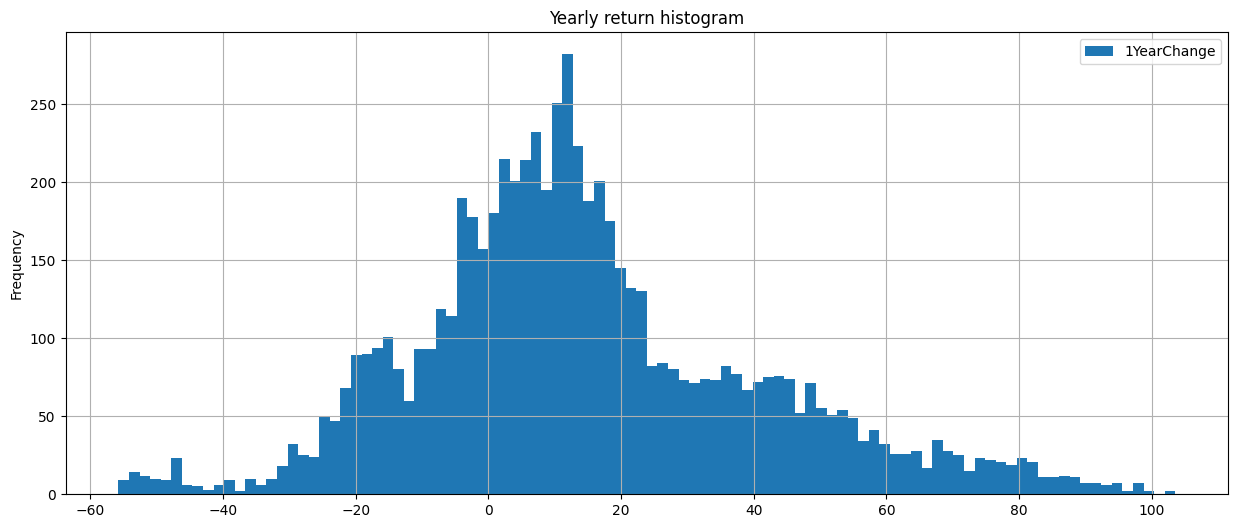

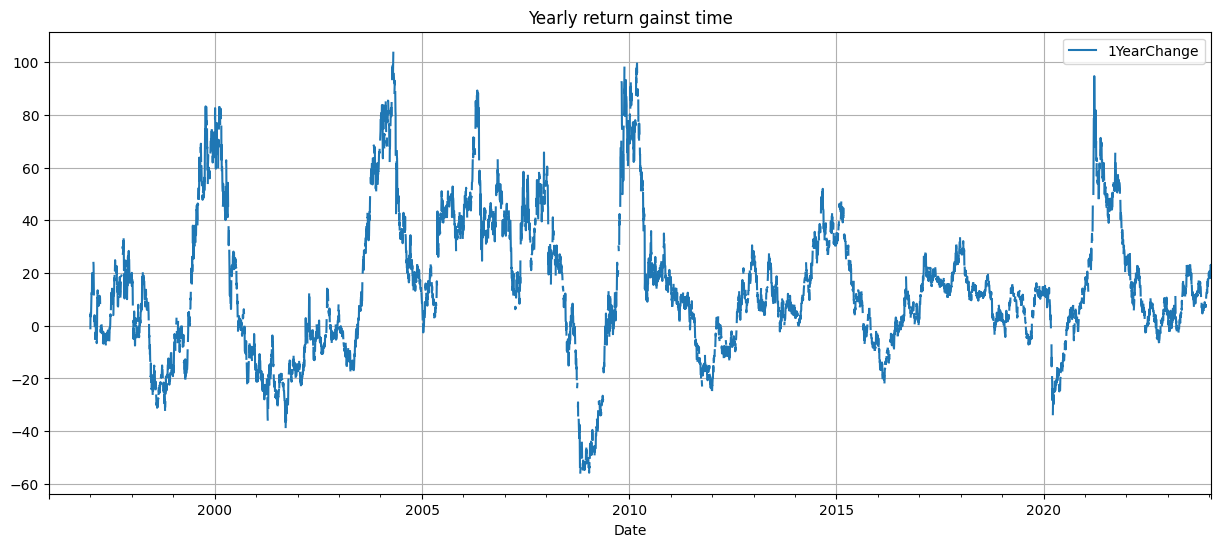

In [9]:
df['1Year'] = (df['CLOSE'] - df['CLOSE'].shift(365))*100/(df['CLOSE'].shift(365))
df['1YearChange'] = np.where(df['Real']== True, df['1Year'] , None)
df.plot(title = 'Yearly return histogram',y='1YearChange',kind='hist', bins=100, figsize=(15,6),grid=True)
df.plot(title = 'Yearly return gainst time', y='1YearChange', figsize=(15,6), grid=True)

<Axes: xlabel='Date'>

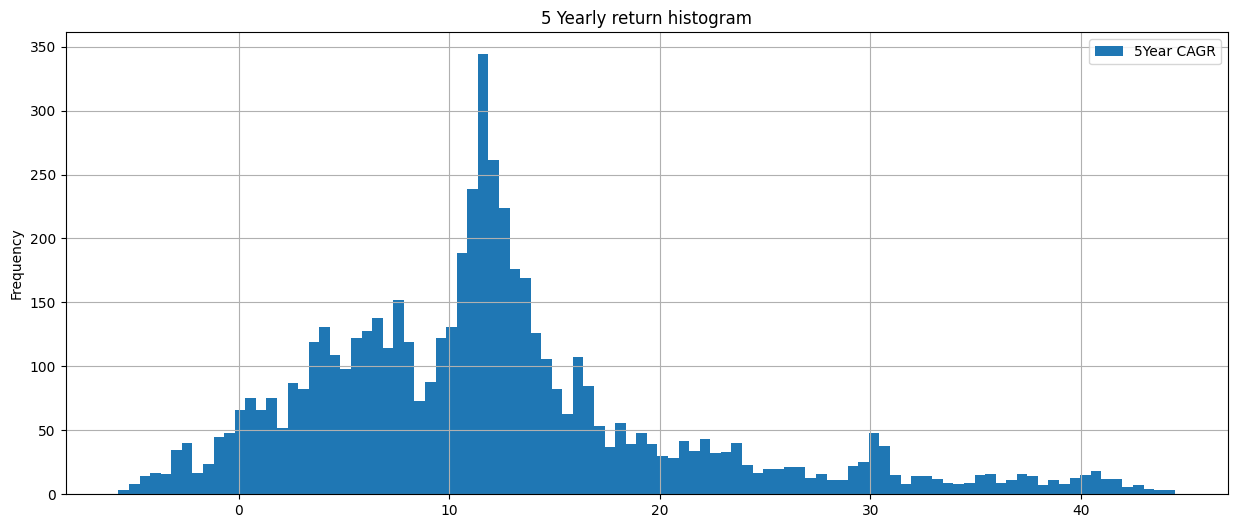

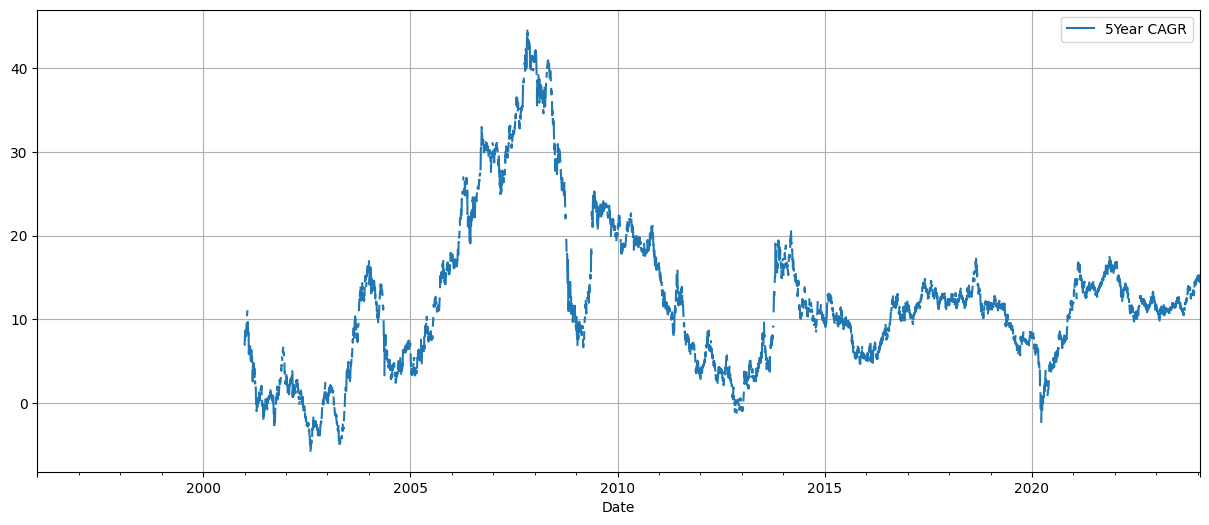

In [10]:
#CAGR (%): = (Ending Value ÷ Beginning Value) ^ (1 ÷ Number of Periods) – 1
df['5Year'] = (((df['CLOSE']/df['CLOSE'].shift(1825))**0.2)-1)*100
df['5Year CAGR'] = np.where(df['Real']== True, df['5Year'], None)
df.plot(title = '5 Yearly return histogram', y='5Year CAGR',kind='hist', bins=100, figsize=(15,6),grid=True)
df.plot(y='5Year CAGR', figsize=(15,6), grid=True)

<Axes: xlabel='Date'>

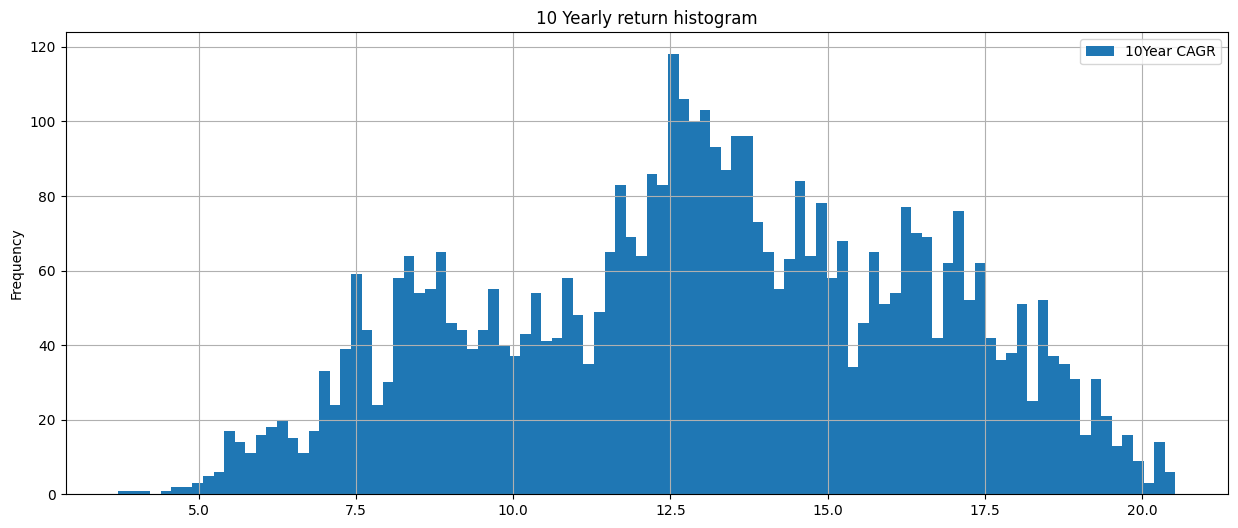

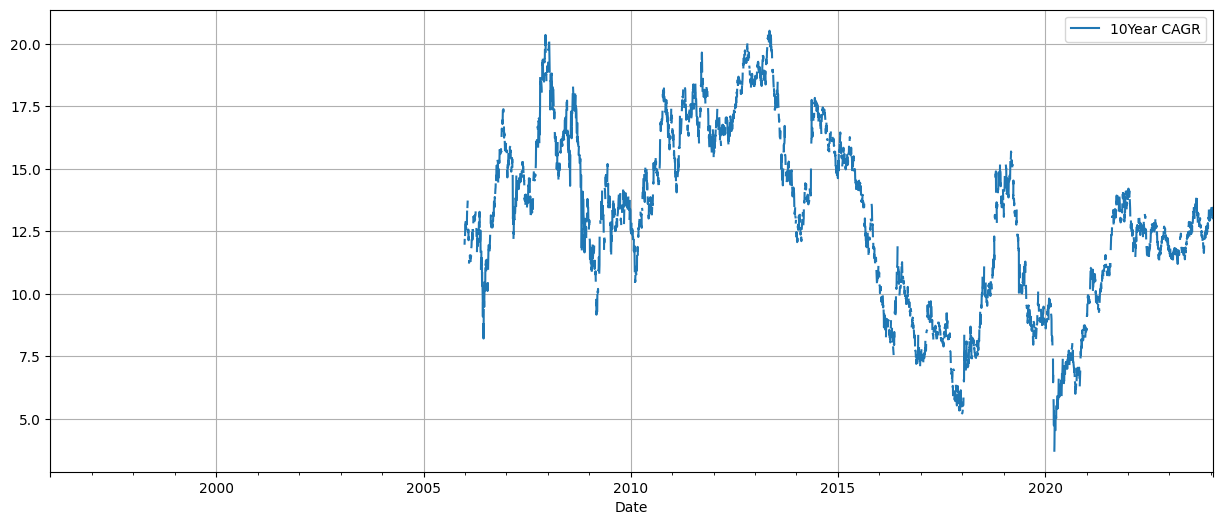

In [11]:
#CAGR (%): = (Ending Value ÷ Beginning Value) ^ (1 ÷ Number of Periods) – 1
df['10Year'] = (((df['CLOSE']/df['CLOSE'].shift(3650))**0.1)-1)*100
df['10Year CAGR'] = np.where(df['Real']== True,df['10Year'] , None)
df.plot(title = '10 Yearly return histogram', y='10Year CAGR',kind='hist', bins=100, figsize=(15,6), grid=True)
df.plot(y='10Year CAGR', kind='line', figsize=(15,6), grid=True)

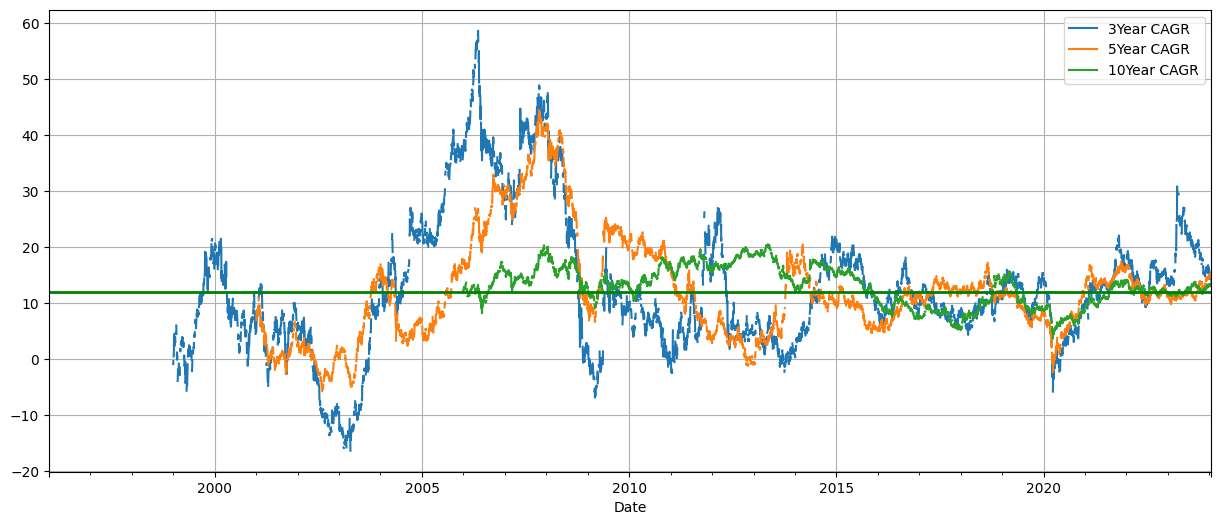

In [12]:
#CAGR (%): = (Ending Value ÷ Beginning Value) ^ (1 ÷ Number of Periods) – 1
df['3Year'] = (((df['CLOSE']/df['CLOSE'].shift(1095))**0.333)-1)*100
df['3Year CAGR'] = np.where(df['Real']== True,df['3Year'] , None)
multi_line_plot = df.plot(y=['3Year CAGR', '5Year CAGR', '10Year CAGR', ], kind='line', figsize=(15,6), grid=True)
multi_line_plot.axhline(y=12, color= 'green', linewidth=2)

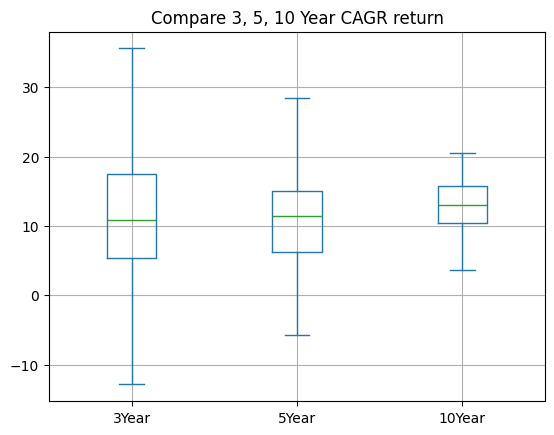

In [21]:
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2).
# Small bar indicate consistency 
box = df.plot(title = 'Compare 3, 5, 10 Year CAGR return', y=['3Year','5Year','10Year'],kind='box',grid=True, showfliers=False)
#box.axhline(y=13, color= 'blue', linewidth=1)